An analysis of baseline results based on the mapped categories. I mapped the new categories to the original ones and analysed the predictions. I calculated the F1 scores only on labels that were not discarded from the joint schema.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,precision_score, recall_score

In [5]:
map_FTD = {'A1 (argumentative)': 'discarded', 'A17 (review)': 'discarded', 'A14 (academic)': 'Information/Explanation', 'A16 (information)': 'Information/Explanation', 'A7 (instruction)': 'Instruction', 'A9 (legal)': 'Legal', 'A8 (news)': 'News', 'A11 (personal)': 'Opinion/Argumentation', 'A12 (promotion)': 'Promotion', 'A4 (fiction)': 'Prose/Lyrical'}

map_GINCO = {'FAQ': 'discarded', 'List of Summaries/Excerpts': 'discarded', 'Forum': 'Forum', 'Information/Explanation': 'Information/Explanation', 'Research Article': 'Information/Explanation', 'Instruction': 'Instruction', 'Recipe': 'Instruction', 'Legal/Regulation': 'Legal', 'Announcement': 'News', 'News/Reporting': 'News', 'Opinionated News': 'News', 'Opinion/Argumentation': 'Opinion/Argumentation', 'Review': 'Opinion/Argumentation', 'Call': 'Other', 'Correspondence': 'Other', 'Interview': 'Other', 'Other': 'Other', 'Script/Drama': 'Other', 'Invitation': 'Promotion', 'Promotion': 'Promotion', 'Promotion of a Product': 'Promotion', 'Promotion of Services': 'Promotion', 'Lyrical': 'Prose/Lyrical', 'Prose': 'Prose/Lyrical'}


map_CORE = {'Advice': 'discarded', 'Course Materials': 'discarded', 'Description of a Person': 'discarded', 'Description of a Thing': 'discarded', 'Description with Intent to Sell': 'discarded', 'FAQ about How-to': 'discarded', 'FAQ about Information': 'discarded', 'Historical Article': 'discarded', 'Information Blog': 'discarded', 'Magazine Article': 'discarded', 'Other Forum': 'discarded', 'Other Information': 'discarded', 'Other Informational Persuasion': 'discarded', 'Other Opinion': 'discarded', 'Other Spoken': 'discarded', 'Poem': 'discarded', 'Question/Answer Forum': 'discarded', 'Reader/Viewer Responses': 'discarded', 'Religious Blogs/Sermons': 'discarded', 'Technical Report': 'discarded', 'Transcript of Video/Audio': 'discarded', 'Travel Blog': 'discarded', 'Discussion Forum': 'Forum', 'Encyclopedia Article': 'Information/Explanation', 'Research Article': 'Information/Explanation', 'How-to': 'Instruction', 'Recipe': 'Instruction', 'Technical Support': 'Instruction', 'Legal terms': 'Legal', 'News Report/Blog': 'News', 'Sports Report': 'News', 'Editorial': 'Opinion/Argumentation', 'Formal Speech': 'Opinion/Argumentation', 'Letter to Editor': 'Opinion/Argumentation', 'Opinion Blog': 'Opinion/Argumentation', 'Personal Blog': 'Opinion/Argumentation', 'Persuasive Article or Essay': 'Opinion/Argumentation', 'Reviews': 'Opinion/Argumentation', 'Interview': 'Other', 'TV/Movie Script': 'Other', 'Advertisement': 'Promotion', 'Prayer': 'Prose/Lyrical', 'Short Story': 'Prose/Lyrical', 'Song Lyrics': 'Prose/Lyrical', 'Other Narrative': 'discarded', 'Other Lyrical': 'discarded', 'Other How-to': 'discarded'}

# GINCO classifier

### GINCO-full set

In [4]:
# Import data
from operator import index


ginco_pred = pd.read_csv("results/GINCO-full-set-classifier-predictions-on-test-sheet-with-predictions.csv", sep="\t", index_col = 0)

ginco_pred

,text,labels,y_pred_GINCO_full_set
574,"Italijanke, doslej še edine neporažene, so že ...",Opinionated News,News/Reporting
636,Novice <p/> Oglasi <p/> MX Proga <p/> Motocros...,Information/Explanation,Information/Explanation
297,Iskanje - forma <p/> Zakaj Demanda <p/> Verjam...,Promotion of Services,Promotion of Services
589,Vabilo lokalnim ponudnikom k sodelovanju pri p...,Invitation,Invitation
19,Prispevki <p/> Vedno več novogradenj in obnov ...,Promotion of a Product,Information/Explanation
...,...,...,...
151,odgovor <p/> K sicer pravilnemu opozorilu na k...,Forum,Forum
643,Povpraševanje po leseni gradnji je na splošno ...,Opinionated News,News/Reporting
436,"Medtem ko smo razmišljali, smo tudi že veliko ...",Promotion,Promotion of Services
592,Objektivnost v času daril <p/> Darila vsi radi...,Opinion/Argumentation,Opinion/Argumentation


In [8]:
# Map the labels
ginco_pred["labels_to-X-GENRE"] = ginco_pred["labels"].map(map_GINCO).fillna("check")

ginco_pred["labels_to-X-GENRE"].value_counts()

News                       45
Promotion                  41
Opinion/Argumentation      27
Information/Explanation    26
discarded                  21
Other                      12
Forum                      11
Instruction                 7
Legal                       3
Name: labels_to-X-GENRE, dtype: int64

In [9]:
# Discard texts with "discarded" labels
ginco_pred = ginco_pred[ginco_pred["labels_to-X-GENRE"] != "discarded"]

ginco_pred.describe()

,text,labels,y_pred_GINCO_full_set,labels_to-X-GENRE
count,172,172,172,172
unique,172,16,14,8
top,"Italijanke, doslej še edine neporažene, so že ...",Information/Explanation,News/Reporting,News
freq,1,26,26,45


In [10]:
# Map the predicted labels as well
ginco_pred["y_pred_to-X-GENRE"] = ginco_pred["y_pred_GINCO_full_set"].map(map_GINCO).fillna("check")

ginco_pred["y_pred_to-X-GENRE"].value_counts()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_13596\1976273367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ginco_pred["y_pred_to-X-GENRE"] = ginco_pred["y_pred_GINCO_full_set"].map(map_GINCO).fillna("check")


News                       49
Promotion                  48
Information/Explanation    26
Opinion/Argumentation      23
Forum                      10
Instruction                 7
discarded                   5
Legal                       3
Other                       1
Name: y_pred_to-X-GENRE, dtype: int64

In [11]:
# Discard texts with "discarded" labels
ginco_pred = ginco_pred[ginco_pred["y_pred_to-X-GENRE"] != "discarded"]

ginco_pred.describe()

,text,labels,y_pred_GINCO_full_set,labels_to-X-GENRE,y_pred_to-X-GENRE
count,167,167,167,167,167
unique,167,16,13,8,8
top,"Italijanke, doslej še edine neporažene, so že ...",Information/Explanation,News/Reporting,News,News
freq,1,26,26,45,49


Analysis of prediction results of the GINCO-full set classifier on 167 texts from the test split. 26 texts were not included, because they belong to the discarded categories.

In [15]:
LABELS = list(ginco_pred["labels_to-X-GENRE"].unique())
LABELS

['News',
 'Information/Explanation',
 'Promotion',
 'Other',
 'Opinion/Argumentation',
 'Forum',
 'Legal',
 'Instruction']

Macro f1: 0.715, Micro f1: 0.725


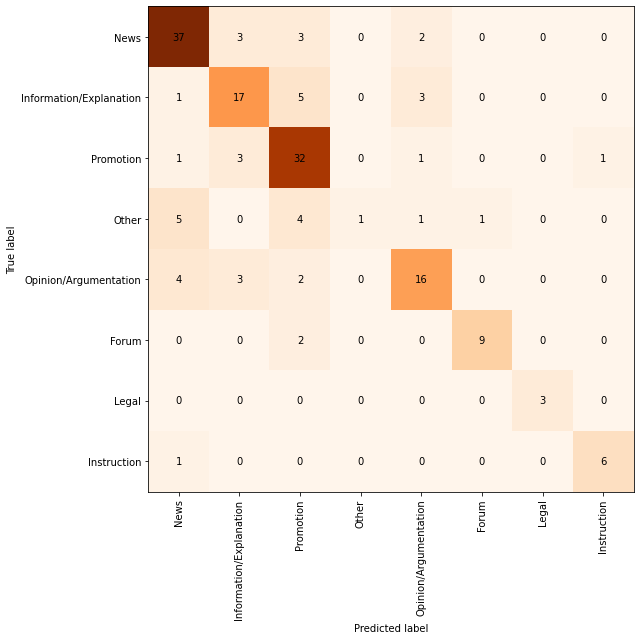

<Figure size 432x288 with 0 Axes>

In [17]:
y_true = list(ginco_pred["labels_to-X-GENRE"])
y_pred = list(ginco_pred["y_pred_to-X-GENRE"])

macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()

### GINCO-downcast set

In [18]:
# Import data
ginco_pred = pd.read_csv("results/testing-GINCO-downcast-on-test-sheet-with-predictions.csv", sep="\t", index_col = 0)

ginco_pred

,text,labels,y_pred_GINCO_downcast
677,Gibanje za dostojno delo in socialno družbo da...,List of Summaries/Excerpts,List of Summaries/Excerpts
355,Toronto Drug Bust v tujini <p/> Na letošnji pr...,Information/Explanation,News/Reporting
500,Član Judo kluba Drava Klemen Ferjan je ta kone...,News/Reporting,News/Reporting
545,prva stran > Vadba > Ostalo > Kaj je MaxxFIT P...,Promotion,Promotion
892,"Opis izdelka <p/> Sightmark Boresight, Najhitr...",Promotion,List of Summaries/Excerpts
...,...,...,...
963,Nahajate se tukaj <p/> White Stain <p/> Ljublj...,Promotion,Promotion
781,Arhiv novic <p/> Vlada izdala uredbo o manjših...,Information/Explanation,News/Reporting
757,TKD Sovica vabi na nov pohod s predavanjem! Te...,List of Summaries/Excerpts,Promotion
871,Znani nasprotniki v kvalifikacijah <p/> Idrija...,News/Reporting,News/Reporting


In [19]:
# Map the labels
ginco_pred["labels_to-X-GENRE"] = ginco_pred["labels"].map(map_GINCO).fillna("check")

ginco_pred["labels_to-X-GENRE"].value_counts()

News                       44
Promotion                  42
Information/Explanation    28
Opinion/Argumentation      26
discarded                  21
Other                      16
Forum                      10
Instruction                 9
Legal                       4
Name: labels_to-X-GENRE, dtype: int64

In [20]:
# Discard texts with "discarded" labels
ginco_pred = ginco_pred[ginco_pred["labels_to-X-GENRE"] != "discarded"]

ginco_pred.describe()

,text,labels,y_pred_GINCO_downcast,labels_to-X-GENRE
count,179,179,179,179
unique,179,8,9,8
top,Toronto Drug Bust v tujini <p/> Na letošnji pr...,News/Reporting,News/Reporting,News
freq,1,44,49,44


In [22]:
# Map the predicted labels as well
ginco_pred["y_pred_to-X-GENRE"] = ginco_pred["y_pred_GINCO_downcast"].map(map_GINCO).fillna("check")

ginco_pred["y_pred_to-X-GENRE"].value_counts()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_13596\1008752452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ginco_pred["y_pred_to-X-GENRE"] = ginco_pred["y_pred_GINCO_downcast"].map(map_GINCO).fillna("check")


News                       49
Promotion                  47
Opinion/Argumentation      25
Information/Explanation    21
Instruction                11
Forum                      10
Other                       8
discarded                   4
Legal                       4
Name: y_pred_to-X-GENRE, dtype: int64

In [23]:
# Discard texts with "discarded" labels
ginco_pred = ginco_pred[ginco_pred["y_pred_to-X-GENRE"] != "discarded"]

ginco_pred.describe()

,text,labels,y_pred_GINCO_downcast,labels_to-X-GENRE,y_pred_to-X-GENRE
count,175,175,175,175,175
unique,175,8,8,8,8
top,Toronto Drug Bust v tujini <p/> Na letošnji pr...,News/Reporting,News/Reporting,News,News
freq,1,42,49,42,49


Analysis of prediction results of the GINCO-downcast classifier on 175 texts from the test split. 25 texts were not included, because they belong to the discarded categories.

In [25]:
LABELS = list(ginco_pred["labels_to-X-GENRE"].unique())
LABELS

['Information/Explanation',
 'News',
 'Promotion',
 'Opinion/Argumentation',
 'Forum',
 'Other',
 'Instruction',
 'Legal']

Macro f1: 0.757, Micro f1: 0.737


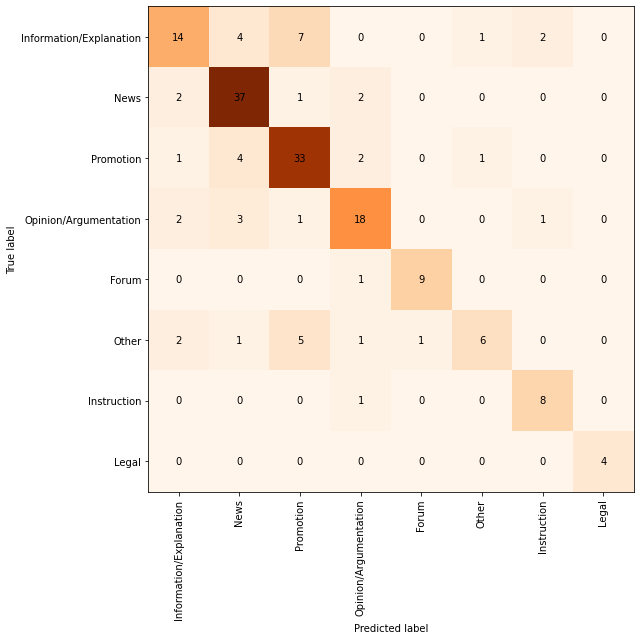

<Figure size 432x288 with 0 Axes>

In [26]:
y_true = list(ginco_pred["labels_to-X-GENRE"])
y_pred = list(ginco_pred["y_pred_to-X-GENRE"])

macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()

# FTD classifier

In [27]:
# Import data
ftd_pred = pd.read_csv("results/FTD-classifier-predictions-on-test-sheet-with-predictions.csv", sep="\t", index_col = 0)

ftd_pred

,text,labels,y_pred,y_true_mapped,y_pred_mapped
926,"Frank , 22 , is unemployed and still living at...",6,6,A4 (fiction),A4 (fiction)
673,The following is the list of ISP supplied by M...,2,7,A12 (promotion),A7 (instruction)
451,Search results for Results 12081 to 12090 of 1...,8,8,A8 (news),A8 (news)
1568,Last-minute solution . Even if it 's something...,7,7,A7 (instruction),A7 (instruction)
1088,1 Application-level Fault-Tolerance Protocols ...,3,3,A14 (academic),A14 (academic)
...,...,...,...,...,...
622,It still sounds quite broad though ? ' A lot o...,1,1,A11 (personal),A11 (personal)
1262,Article III of the United States Constitution ...,9,4,A9 (legal),A16 (information)
1429,A How-To Guide for Purchasing Salvage Vehicles...,7,7,A7 (instruction),A7 (instruction)
436,Most liaison psychiatry posts are now managed ...,9,7,A9 (legal),A7 (instruction)


In [28]:
# Map the labels
ftd_pred["labels_to-X-GENRE"] = ftd_pred["y_true_mapped"].map(map_FTD).fillna("check")

ftd_pred["labels_to-X-GENRE"].value_counts()

discarded                  73
Promotion                  51
Information/Explanation    49
Instruction                33
News                       27
Prose/Lyrical              19
Opinion/Argumentation      16
Legal                      15
Name: labels_to-X-GENRE, dtype: int64

In [29]:
# Discard texts with "discarded" labels
ftd_pred = ftd_pred[ftd_pred["labels_to-X-GENRE"] != "discarded"]

ftd_pred.describe()

,labels,y_pred
count,210.000000,210.000000
mean,4.733333,4.638095
std,2.616717,2.749941
min,1.000000,0.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,7.000000,7.000000
max,9.000000,9.000000


In [30]:
# Map the predicted labels as well
ftd_pred["y_pred_to-X-GENRE"] = ftd_pred["y_pred_mapped"].map(map_FTD).fillna("check")

ftd_pred["y_pred_to-X-GENRE"].value_counts()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_13596\2978306926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftd_pred["y_pred_to-X-GENRE"] = ftd_pred["y_pred_mapped"].map(map_FTD).fillna("check")


Promotion                  47
Information/Explanation    40
Instruction                33
News                       30
Prose/Lyrical              18
Opinion/Argumentation      16
discarded                  13
Legal                      13
Name: y_pred_to-X-GENRE, dtype: int64

In [31]:
# Discard texts with "discarded" labels
ftd_pred = ftd_pred[ftd_pred["y_pred_to-X-GENRE"] != "discarded"]

ftd_pred.describe()

,labels,y_pred
count,197.000000,197.000000
mean,4.705584,4.842640
std,2.599965,2.651647
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,7.000000,7.000000
max,9.000000,9.000000


In [32]:
283-197

86

Analysis of prediction results of the FTD classifier on 197 texts from the test split. 86 texts were not included, because they belong to the discarded categories.

In [33]:
LABELS = list(ftd_pred["labels_to-X-GENRE"].unique())
LABELS

['Prose/Lyrical',
 'Promotion',
 'News',
 'Instruction',
 'Information/Explanation',
 'Opinion/Argumentation',
 'Legal']

Macro f1: 0.859, Micro f1: 0.853


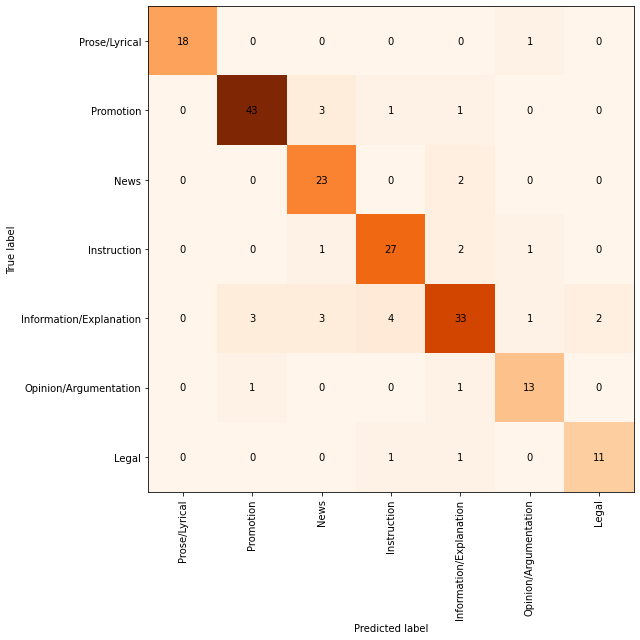

<Figure size 432x288 with 0 Axes>

In [34]:
y_true = list(ftd_pred["labels_to-X-GENRE"])
y_pred = list(ftd_pred["y_pred_to-X-GENRE"])

macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()

# CORE

In [35]:
import json
# Import data
core_pred = pd.read_json("results/CORE-main-Experiments-Results.json")

core_pred

,experiment,num_train_epochs,train_batch_size,learning_rate,microF1,macroF1,y_true,y_pred
0,testing-CORE-main-on-dev,4,8,0.00001,0.736180,0.623031,"{'6282': 'Narrative', '7725': 'Narrative', '18...","{'6282': 'Narrative', '7725': 'Narrative', '18..."
1,testing-CORE-main-on-test,4,8,0.00001,0.744662,0.620480,{'32898': 'Informational Description/Explanati...,{'32898': 'Informational Description/Explanati...
2,testing-CORE-sub-on-dev,6,8,0.00001,0.661529,0.395807,"{'30471': 'News Report/Blog', '29668': 'Sports...","{'30471': 'News Report/Blog', '29668': 'Sports..."
3,testing-CORE-sub-on-test,6,8,0.00001,0.661214,0.394314,"{'18157': 'Personal Blog', '38004': 'Opinion B...","{'18157': 'Opinion Blog', '38004': 'Sports Rep..."


In [36]:
core_pred = core_pred[core_pred["experiment"] == "testing-CORE-sub-on-test"]
core_pred

,experiment,num_train_epochs,train_batch_size,learning_rate,microF1,macroF1,y_true,y_pred
3,testing-CORE-sub-on-test,6,8,0.00001,0.661214,0.394314,"{'18157': 'Personal Blog', '38004': 'Opinion B...","{'18157': 'Opinion Blog', '38004': 'Sports Rep..."


In [47]:
list(core_pred["y_pred"].to_list()[0].values()=ore_pred["y_pred"].to_list()[0].values()

dict_values(['Opinion Blog', 'Sports Report', 'News Report/Blog', 'Sports Report', 'Description of a Thing', 'Description of a Thing', 'News Report/Blog', 'Opinion Blog', 'Reviews', 'Information Blog', 'Personal Blog', 'Sports Report', 'Research Article', 'Sports Report', 'News Report/Blog', 'Discussion Forum', 'Reviews', 'Information Blog', 'News Report/Blog', 'How-to', 'News Report/Blog', 'News Report/Blog', 'Research Article', 'News Report/Blog', 'How-to', 'Reviews', 'Information Blog', 'Description of a Thing', 'Reviews', 'News Report/Blog', 'Opinion Blog', 'Interview', 'Interview', 'Description of a Thing', 'Personal Blog', 'News Report/Blog', 'Opinion Blog', 'News Report/Blog', 'Information Blog', 'Legal terms', 'News Report/Blog', 'Reviews', 'News Report/Blog', 'Opinion Blog', 'Description of a Thing', 'Description of a Thing', 'Personal Blog', 'Description with Intent to Sell', 'Information Blog', 'Research Article', 'Description of a Thing', 'Historical Article', 'How-to', 'Op

In [50]:
core_pred_df = pd.DataFrame({"y_true": list(core_pred["y_true"].to_list()[0].values()), "y_pred": list(core_pred["y_pred"].to_list()[0].values())})

core_pred_df

,y_true,y_pred
0,Personal Blog,Opinion Blog
1,Opinion Blog,Sports Report
2,News Report/Blog,News Report/Blog
3,Sports Report,Sports Report
4,Information Blog,Description of a Thing
...,...,...
3174,Advice,Information Blog
3175,News Report/Blog,Description of a Person
3176,Research Article,Research Article
3177,Opinion Blog,Opinion Blog


In [52]:
# Map the labels
core_pred_df["labels_to-X-GENRE"] = core_pred_df["y_true"].map(map_CORE).fillna("check")

core_pred_df["labels_to-X-GENRE"].value_counts()

News                       1066
discarded                   890
Opinion/Argumentation       718
Forum                       156
Instruction                 123
Information/Explanation     108
Prose/Lyrical                66
Other                        37
Legal                        15
Name: labels_to-X-GENRE, dtype: int64

In [53]:
# Discard texts with "discarded" labels
core_pred_df = core_pred_df[core_pred_df["labels_to-X-GENRE"] != "discarded"]

core_pred_df.describe()

,y_true,y_pred,labels_to-X-GENRE
count,2289,2289,2289
unique,19,23,8
top,News Report/Blog,News Report/Blog,News
freq,840,794,1066


In [54]:
# Map the predicted labels as well
core_pred_df["y_pred_to-X-GENRE"] = core_pred_df["y_pred"].map(map_CORE).fillna("check")

core_pred_df["y_pred_to-X-GENRE"].value_counts()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_13596\1479538369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_pred_df["y_pred_to-X-GENRE"] = core_pred_df["y_pred"].map(map_CORE).fillna("check")


News                       1023
Opinion/Argumentation       590
discarded                   241
Forum                       137
Instruction                 109
Information/Explanation      83
Prose/Lyrical                60
Other                        34
Legal                        12
Name: y_pred_to-X-GENRE, dtype: int64

In [55]:
# Discard texts with "discarded" labels
core_pred_df = core_pred_df[core_pred_df["y_pred_to-X-GENRE"] != "discarded"]

core_pred_df.describe()

,y_true,y_pred,labels_to-X-GENRE,y_pred_to-X-GENRE
count,2048,2048,2048,2048
unique,19,14,8,8
top,News Report/Blog,News Report/Blog,News,News
freq,783,794,1004,1023


In [56]:
3179-2048

1131

Analysis of prediction results of the CORE-sub classifier on 2048 texts from the test split. 1131 texts were not included, because they belong to the discarded categories.

In [57]:
LABELS = list(core_pred_df["labels_to-X-GENRE"].unique())
LABELS

['Opinion/Argumentation',
 'News',
 'Forum',
 'Instruction',
 'Information/Explanation',
 'Legal',
 'Prose/Lyrical',
 'Other']

Macro f1: 0.86, Micro f1: 0.867


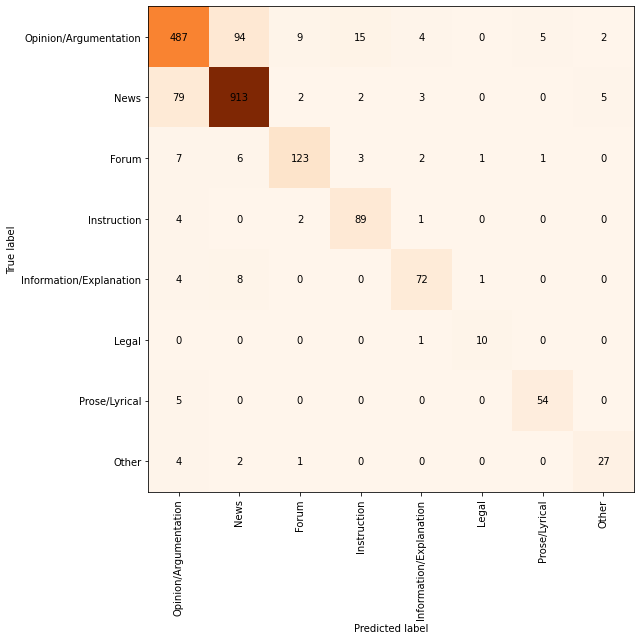

<Figure size 432x288 with 0 Axes>

In [58]:
y_true = list(core_pred_df["labels_to-X-GENRE"])
y_pred = list(core_pred_df["y_pred_to-X-GENRE"])

macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()